In [1]:
import pandas as pd


data = pd.read_csv("traffic_accidents.csv")


print(data.head())


               crash_date traffic_control_device weather_condition  \
0  07/29/2023 01:00:00 PM         TRAFFIC SIGNAL             CLEAR   
1  08/13/2023 12:11:00 AM         TRAFFIC SIGNAL             CLEAR   
2  12/09/2021 10:30:00 AM         TRAFFIC SIGNAL             CLEAR   
3  08/09/2023 07:55:00 PM         TRAFFIC SIGNAL             CLEAR   
4  08/19/2023 02:55:00 PM         TRAFFIC SIGNAL             CLEAR   

       lighting_condition first_crash_type trafficway_type  \
0                DAYLIGHT          TURNING     NOT DIVIDED   
1  DARKNESS, LIGHTED ROAD          TURNING        FOUR WAY   
2                DAYLIGHT         REAR END  T-INTERSECTION   
3                DAYLIGHT            ANGLE        FOUR WAY   
4                DAYLIGHT         REAR END  T-INTERSECTION   

            alignment roadway_surface_cond road_defect  \
0  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN   
1  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
2  STRAIGHT AND LEVEL           

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


data_encoded = data.copy()
label_encoders = {}
for column in data_encoded.columns:
    if data_encoded[column].dtype == 'object':
        le = LabelEncoder()
        data_encoded[column] = le.fit_transform(data_encoded[column])
        label_encoders[column] = le


X = data_encoded.drop(columns=['crash_date', 'crash_type'])
y = data_encoded['crash_type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

                    Merkmal  Bedeutung
13           injuries_total   0.453526
19               crash_hour   0.091718
21              crash_month   0.080000
20        crash_day_of_week   0.061809
9                    damage   0.049545
3          first_crash_type   0.049362
4           trafficway_type   0.044067
10  prim_contributory_cause   0.042341
18   injuries_no_indication   0.023221
0    traffic_control_device   0.023013


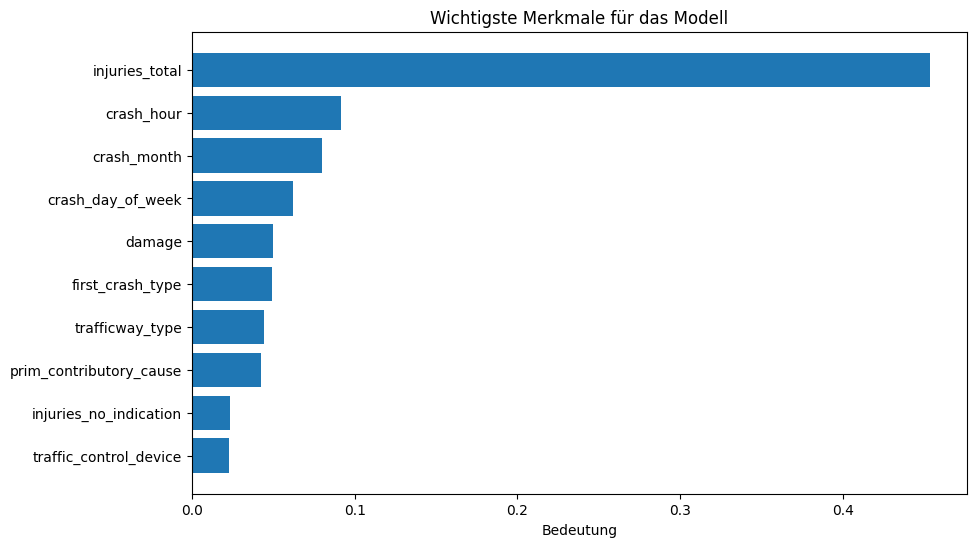

In [3]:
# Wichtige Merkmale anzeigen
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
features = X.columns

# Sortiert anzeigen (optional: Top 10)
importance_df = pd.DataFrame({'Merkmal': features, 'Bedeutung': feature_importances})
importance_df = importance_df.sort_values(by='Bedeutung', ascending=False)

# Ausgabe als Tabelle
print(importance_df.head(10))  # zeige Top 10

# Ausgabe als Diagramm
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Merkmal'][:10], importance_df['Bedeutung'][:10])
plt.xlabel("Bedeutung")
plt.title("Wichtigste Merkmale für das Modell")
plt.gca().invert_yaxis()
plt.show()


### 4.1 Wichtige Merkmale

Das wichtigste Merkmal für das Modell ist `injuries_total`, gefolgt von zeitbezogenen Informationen wie `crash_hour` und `crash_month`. Auch `damage` und `first_crash_type` spielen eine relevante Rolle. Diese Merkmale tragen am stärksten zur Entscheidung des Modells bei, ob ein Unfall Verletzungen zur Folge hatte.


In [4]:
y_pred = model.predict(X_test)


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [9]:
f1 = f1_score(y_test, y_pred)
print("F1-Score:", round(f1, 3))


F1-Score: 0.811


### 4.2 Messmetrik

Für die Bewertung des Modells wurde der F1-Score verwendet. Er ist besonders geeignet, wenn sowohl falsche positive als auch falsche negative Vorhersagen vermieden werden sollen. Da unser Ziel ist, Verletzungsunfälle korrekt zu erkennen, ohne zu viele Fehlalarme auszulösen, eignet sich der F1-Score ideal für dieses Klassifikationsproblem.


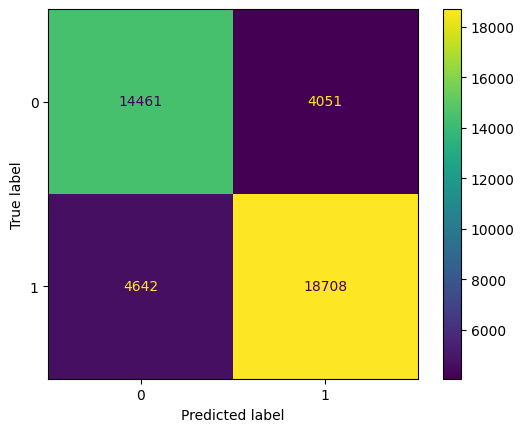

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [11]:

tn, fp, fn, tp = cm.ravel()


sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


print("Sensitivität (Recall):", round(sensitivity, 3))
print("Spezifität:", round(specificity, 3))


Sensitivität (Recall): 0.801
Spezifität: 0.781


### 4.3 Wahrheitsmatrix, Sensitivität und Spezifität

Die Confusion Matrix zeigt, dass das Modell viele Unfälle korrekt klassifiziert. Die berechnete Sensitivität beträgt 0.801, was bedeutet, dass rund 80 % der tatsächlichen Verletzungsfälle erkannt werden. Die Spezifität liegt bei 0.781 und zeigt, dass auch rund 78 % der Nicht-Verletzungsfälle richtig erkannt werden. Insgesamt deutet das auf ein ausgewogenes Modell hin.


### 4.4 Bewertung und Hypothesen

Das Modell liefert insgesamt gute Ergebnisse. Mit einer Sensitivität von 0.801 und einer Spezifität von 0.781 erkennt es sowohl Verletzungsfälle als auch Nicht-Verletzungsfälle zuverlässig. Eine mögliche Erklärung ist, dass Merkmale wie `injuries_total` oder `crash_hour` stark mit der Unfallart zusammenhängen und das Modell dadurch klare Muster erkennen kann.
